# **Student dropout likelihood prediction using Deep Neural Network (DNN)**

## **Determining the probability of student expulsion using Deep Neural Network**

### **Target:**

build an efficient Deep Neural Network model to determine the probability of student expulsion

### **Data Used: **

student data (personal data, academic data). source: https://www.kaggle.com/datasets/dipam7/student-grade-prediction

**Plan:**
1. Data preparation;
2. Preliminary analysis;
3. Model application, optimization;
4. Visualization.

### 1. Data preparation

In [1]:
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore

In [2]:
# Loading data
dataset = pd.read_csv(r"E:\Projects\Student Dropout Prediction\student-mat.csv")
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
# Checking data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
# Modify the required data types
dataset['school'] = dataset['school'].apply(lambda x: 1 if x == 'GP' else 0)
dataset['sex'] = dataset['sex'].apply(lambda x: 1 if x == 'M' else 0)
dataset['address'] = dataset['address'].apply(lambda x: 1 if x == 'U' else 0)
dataset['famsize'] = dataset['famsize'].apply(lambda x: 1 if x == 'GT3' else 0)
dataset['Pstatus'] = dataset['Pstatus'].apply(lambda x: 1 if x == 'T' else 0)

def parse_job_vals(x):
  if x == 'teacher':
    return 1
  elif x == 'health':
    return 2
  elif x == 'service':
    return 3
  elif x == 'other':
    return 4
  else:
    return 0

dataset['Mjob'] = dataset['Mjob'].apply(parse_job_vals)
dataset['Fjob'] = dataset['Fjob'].apply(parse_job_vals)

def parse_reason_vals(x):
  if x == 'home':
    return 1
  elif x == 'reputation':
    return 2
  elif x == 'course':
    return 3
  else:
    return 0

dataset['reason'] = dataset['reason'].apply(parse_reason_vals)

def parse_guardian_vals(x):
  if x == 'father':
    return 1
  elif x == 'mother':
    return 2
  else:
    return 0
    
dataset['guardian'] = dataset['guardian'].apply(parse_guardian_vals)
dataset['schoolsup'] = dataset['schoolsup'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['famsup'] = dataset['famsup'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['paid'] = dataset['paid'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['activities'] = dataset['activities'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['nursery'] = dataset['nursery'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['higher'] = dataset['higher'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['internet'] = dataset['internet'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['romantic'] = dataset['romantic'].apply(lambda x: 1 if x == 'yes' else 0)
dataset['G3'] = dataset['G3'].apply(lambda x: 1 if x >= 10 else 0)  

dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,1,0,4,4,0,1,...,4,3,4,1,1,3,6,5,6,0
1,1,0,17,1,1,1,1,1,0,4,...,5,3,3,1,1,3,4,5,5,0
2,1,0,15,1,0,1,1,1,0,4,...,4,3,2,2,3,3,10,7,8,1
3,1,0,15,1,1,1,4,2,2,0,...,3,2,2,1,1,5,2,15,14,1
4,1,0,16,1,1,1,3,3,4,4,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,1,0,0,2,2,0,0,...,5,5,4,4,5,4,11,9,9,0
391,0,1,17,1,0,1,3,1,0,0,...,2,4,5,3,4,2,3,14,16,1
392,0,1,21,0,1,1,1,1,4,4,...,5,5,3,3,3,3,3,10,8,0
393,0,1,18,0,0,1,3,2,0,4,...,4,4,1,3,4,5,0,11,12,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

### Application of models, optimization

In [6]:
# Convert to ndarray matrices
df = dataset.values
df

array([[ 1,  0, 18, ...,  5,  6,  0],
       [ 1,  0, 17, ...,  5,  5,  0],
       [ 1,  0, 15, ...,  7,  8,  1],
       ...,
       [ 0,  1, 21, ..., 10,  8,  0],
       [ 0,  1, 18, ..., 11, 12,  1],
       [ 0,  1, 19, ...,  8,  9,  0]], shape=(395, 33))

In [7]:
# Divide the values of X and Y
X = df[:, 0:32]
Y = df[:, 32]

In [8]:
X

array([[ 1,  0, 18, ...,  6,  5,  6],
       [ 1,  0, 17, ...,  4,  5,  5],
       [ 1,  0, 15, ..., 10,  7,  8],
       ...,
       [ 0,  1, 21, ...,  3, 10,  8],
       [ 0,  1, 18, ...,  0, 11, 12],
       [ 0,  1, 19, ...,  5,  8,  9]], shape=(395, 32))

In [9]:
Y

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [10]:
# Normalize (scale in the range 0-1) the data using MinMaxScaler
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[1.        , 0.        , 0.42857143, ..., 0.08      , 0.125     ,
        0.31578947],
       [1.        , 0.        , 0.28571429, ..., 0.05333333, 0.125     ,
        0.26315789],
       [1.        , 0.        , 0.        , ..., 0.13333333, 0.25      ,
        0.42105263],
       ...,
       [0.        , 1.        , 0.85714286, ..., 0.04      , 0.4375    ,
        0.42105263],
       [0.        , 1.        , 0.42857143, ..., 0.        , 0.5       ,
        0.63157895],
       [0.        , 1.        , 0.57142857, ..., 0.06666667, 0.3125    ,
        0.47368421]], shape=(395, 32))

In [11]:
# We divide the data into training (80%) and test (20% - test, validation 10% each)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(316, 32) (39, 32) (40, 32) (316,) (39,) (40,)


In [12]:
# Building the DNN model and architecture
# Initializing the ANN
model = Sequential()
# Adding layers with 32 neurons
model.add(Dense(units=32, activation='relu', input_dim=32))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

c:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Optimization using Stochastic Gradient Descent (SGD)
# Calculating the error using Logistic Cost Function (binary cross entropy)
# As a measurement of accuracy, we take the accuracy metric
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# We train the model with parameters: batch size - 32, number of cycles - 100
hist = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, Y_val)
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6456 - loss: 0.6739 - val_accuracy: 0.6667 - val_loss: 0.6567
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6582 - loss: 0.6668 - val_accuracy: 0.6667 - val_loss: 0.6488
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6582 - loss: 0.6604 - val_accuracy: 0.6667 - val_loss: 0.6422
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6582 - loss: 0.6552 - val_accuracy: 0.6667 - val_loss: 0.6364
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6582 - loss: 0.6508 - val_accuracy: 0.6667 - val_loss: 0.6315
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6582 - loss: 0.6470 - val_accuracy: 0.6667 - val_loss: 0.6271
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6582 - loss: 0.6438 - val_accuracy: 0.6667 - val_loss: 0.6231
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6582 - loss: 0.6407 - val_accuracy: 0.6667 -

In [15]:
# Assessing the effectiveness of the model
model.evaluate(X_test, Y_test)[1]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8500 - loss: 0.4022


0.8500000238418579

In [16]:
# Make a prediction
prediction = model.predict(X_test)
print(prediction)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.86020154]
 [0.8645213 ]
 [0.95393515]
 [0.87718153]
 [0.99030447]
 [0.8505882 ]
 [0.7438805 ]
 [0.4854678 ]
 [0.6716616 ]
 [0.56571996]
 [0.6931116 ]
 [0.9480701 ]
 [0.96408033]
 [0.977457  ]
 [0.46874413]
 [0.85341454]
 [0.9689271 ]
 [0.24005894]
 [0.9863743 ]
 [0.9376283 ]
 [0.76400155]
 [0.8316641 ]
 [0.76262015]
 [0.2566214 ]
 [0.89455146]
 [0.9508994 ]
 [0.9194296 ]
 [0.9765798 ]
 [0.9720531 ]
 [0.91660297]
 [0.9933429 ]
 [0.885509  ]
 [0.96211416]
 [0.25160292]
 [0.64040995]
 [0.68249214]
 [0.9236916 ]
 [0.88098866]
 [0.76967406]
 [0.9359119 ]]


In [17]:
# Interpret the obtained data using the threshold of 0.80
# If the probability that a student will move on to the next course/graduate is higher than 80%:
# define him as a successful student
# If lower:
# define him as a student who will drop out   
prediction = [1 if y >= 0.80 else 0 for y in prediction]
print(prediction)

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1]


### Visualization of the model's effectiveness

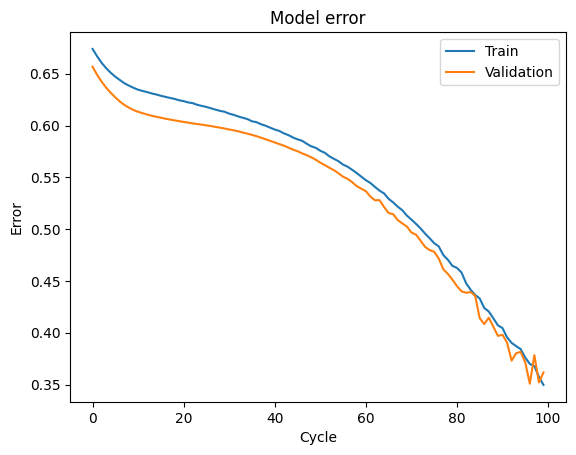

In [18]:
# Visualize training and validation set errors to see if there is overfit
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model error')
plt.ylabel('Error')
plt.xlabel('Cycle')
plt.legend(['Train', 'Validation'])

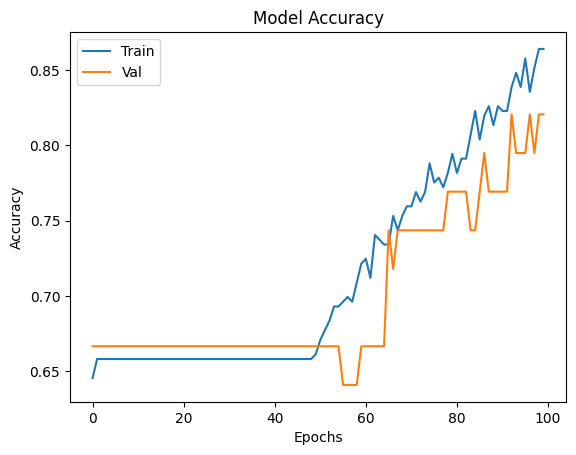

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

In [20]:
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [21]:
import numpy as np

example_data = [[1, 1, 22, 1, 1, 1, 4, 3, 1, 3, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 3, 5, 1, 1, 1, 3, 20, 65, 57]]
example_data = np.array(example_data)

prediction = model.predict(example_data)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[[1.]]


In [22]:
import joblib

# Save the trained Keras model
model.save('student_dropout_model.keras')

# Save the fitted
MinMaxScaler
joblib.dump(min_max_scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']